# Summary of Noise Runs

Anastasia on Monday on MatterMost:

hi @Thomas Dietel , so we already managed to take two noise runs using Ole's new workflow, which worked very well. the CCDB objects are here: http://alice-ccdb.cern.ch/browse/TRD/Calib/ChannelStatus  (from run numbers 534640, 534642). conditions for taking the data were the same as in previous runs (same config, same trigger rate, HV is SS) 



In [1]:
import ROOT
from IPython.display import display_html
%jsroot off

Welcome to JupyROOT 6.28/02


In [2]:
ROOT.gROOT.LoadMacro("CheckNoiseRun.C");

In [3]:
import requests

def list_noise_runs(ccdb="http://alice-ccdb.cern.ch"):
    if not ccdb.endswith("/"):
        ccdb += "/"

    r = requests.get(ccdb+"browse/TRD/Calib/ChannelStatus/")
    for l in r.text.splitlines():
        if l.startswith("Validity: "):
            start_ts = int(l.split()[1])
            start_time = " ".join(l.split()[4:10])[1:]
        if l.startswith("  runNumber = "):
            if start_ts == 1670426250511: 
                # skip old noise runs with incompatbile CalObject
                continue
            
            run_number = int(l.split()[2])
            print(f"Run {run_number}: start time: {start_time} ({start_ts})")
            

In [4]:
display_html("<h2>Noise runs in production CCDB:</h2>", raw=True)
list_noise_runs()

display_html("<h2>Noise objects in test CCDB:</h2>", raw=True)
list_noise_runs("http://ccdb-test.cern.ch:8080/")

Noise runs in production CCDB:

Run 534642: start time: Mon Apr 17 16:08:32 CEST 2023 (1681740512656)
Run 534640: start time: Mon Apr 17 15:48:32 CEST 2023 (1681739312939)


Noise objects in test CCDB:

Run 533031: start time: Fri Mar 17 15:44:14 CET 2023 (1679064254530)
Run 533031: start time: Fri Mar 17 15:44:14 CET 2023 (1679064254528)
Run 533031: start time: Fri Mar 17 15:47:45 CET 2023 (1679064465077)


In [5]:
%%cpp

// Set up default classifier - easier in ROOT syntax

classifier = ChannelStatusClassifier({
    {"Good", kGreen + 1, 9.0, 10.2, 0.7, 1.8},
    {"LowNoise", kRed, 9.0, 10.2, 0.0, 0.7},
    {"Noisy", kRed, 9.0, 10.2, 1.8, 7.0},
    {"HighMeanRMS", kRed, 8.0, 25.0, 7.0, 30.0},
    {"HighMean", kRed, 10.5, 25.0, 2.0, 6.0},
    {"HighBaseline", kRed, 10.5, 520.0, 0.0, 10.0},
    {"VeryHighNoise", kRed, 0.0, 200.0, 30.0, 180.0},
    {"Ugly1", kRed, 200., 350., 15.0, 45.0},
    {"Ugly2", kRed, 200., 350., 45.0, 70.0},
    {"Ugly3", kRed, 350., 550., 10.0, 25.0},
    {"Ugly4", kRed, 350., 550., 25.0, 60.0}
});

In [6]:
class RunInfo():
    '''RunInfo - class to hold information about a run'''
    def __init__(self, x, create_df = True, classifier = None):
        self.calobject = ROOT.LoadNoiseCalObject(x)
        
        if create_df:
            self.df = ROOT.BuildNoiseDF(self.calobject)
            if classifier is not None:
                print("adding classification")
                self.df = classifier.AddToRDF(self.df)
        else:
            self.df = None

In [7]:
# run533031 = ROOT.LoadNoiseCalObject(1681210184624)
# run534640 = ROOT.LoadNoiseCalObject(1681739312940)

run534640 = RunInfo(1681739312940, classifier=ROOT.classifier)

adding classification
[INFO] Init CcdApi with UserAgentID: jupyter-tdietel-1684839147-VcARlL, Host: http://alice-ccdb.cern.ch/
[INFO] ccdb reads http://alice-ccdb.cern.ch/TRD/Calib/ChannelStatus/1681739312939/e41dfed6-dd26-11ed-99fa-0aa2047e1b9a for 1681739312940 (retrieve, agent_id: jupyter-tdietel-1684839147-VcARlL), 


Info in <TJAlienConnectionManager>: Opening connection to JCentral. Please wait
Info in <TJAlienConnectionManager>: Opening connection to 137.138.99.169
Info in <TJAlienConnectionManager>: Successfully connected to 137.138.99.169
Info in <TJAlienFile::Open>: Accessing file /alice/data/CCDB/TRD/Calib/ChannelStatus/08/63746/e41dfed6-dd26-11ed-99fa-0aa2047e1b9a in SE <ALICE::CERN::OCDB>


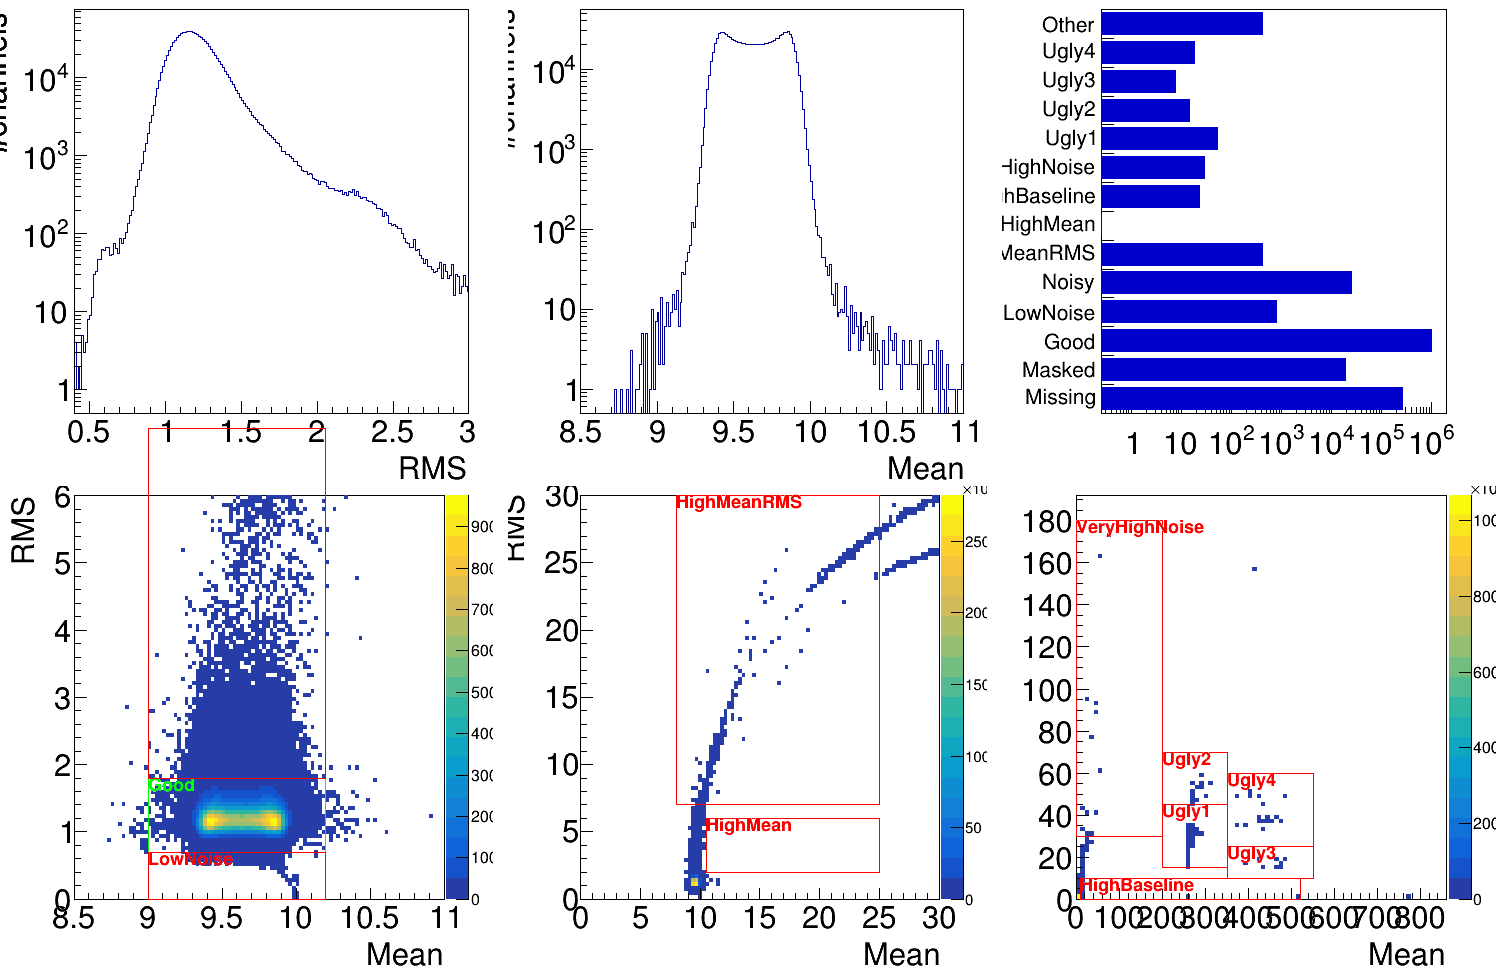

In [8]:
ROOT.MakeRunSummary(run534640.df, ROOT.classifier).Draw()

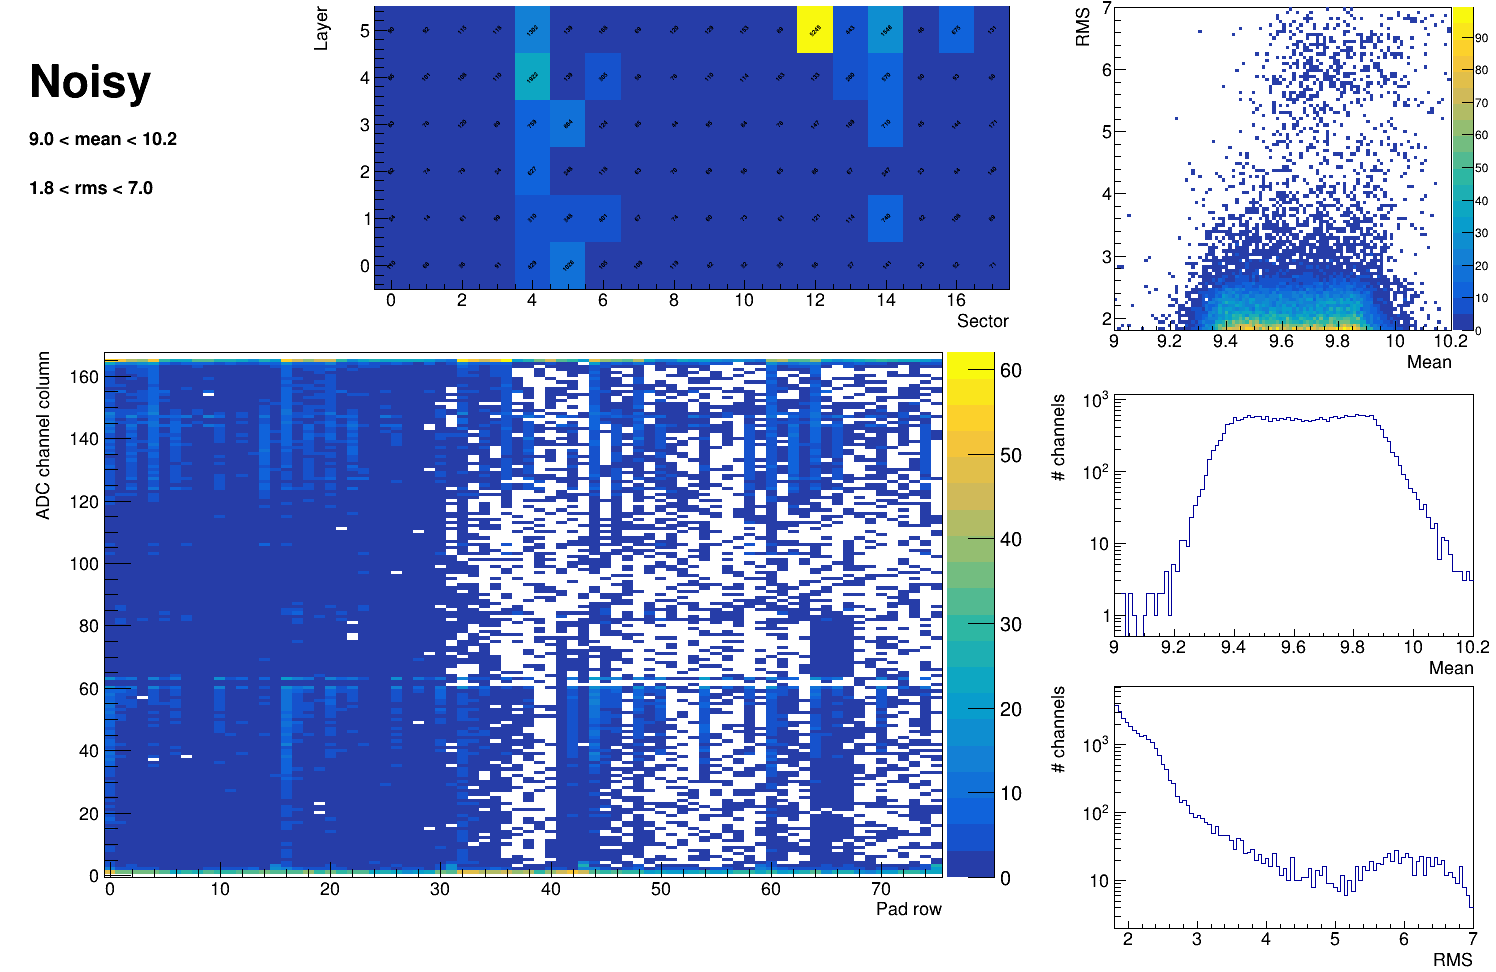

In [9]:
ROOT.MakeClassSummary(run534640.df.Filter("class==2"), ROOT.classifier[2]).Draw()

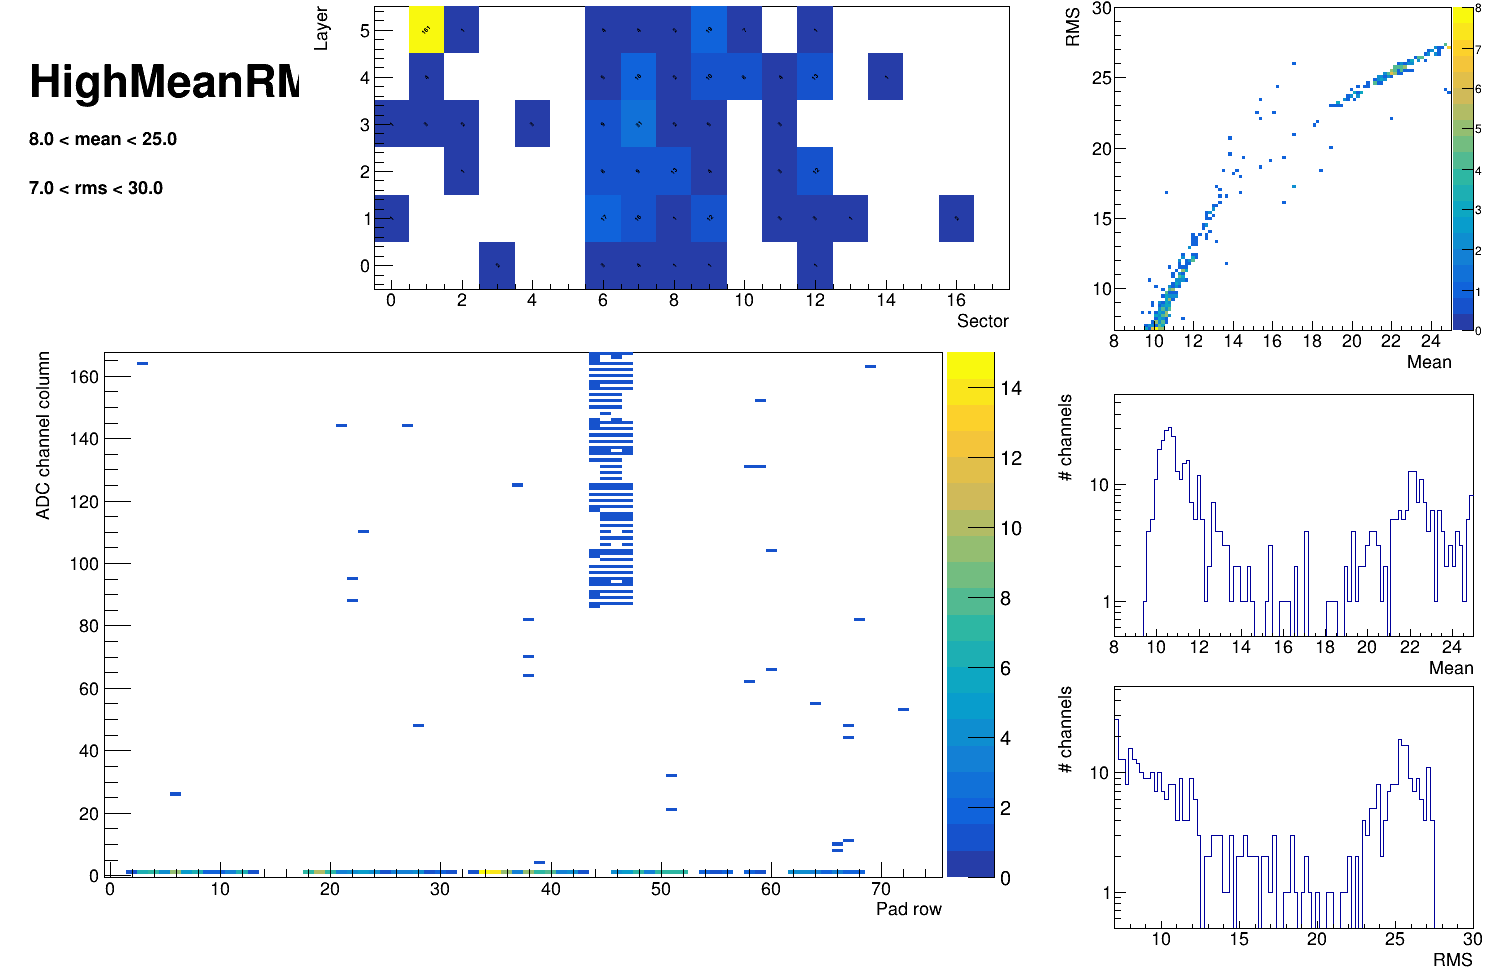

In [10]:
ROOT.MakeClassSummary(run534640.df.Filter("class==3"), ROOT.classifier[3]).Draw()

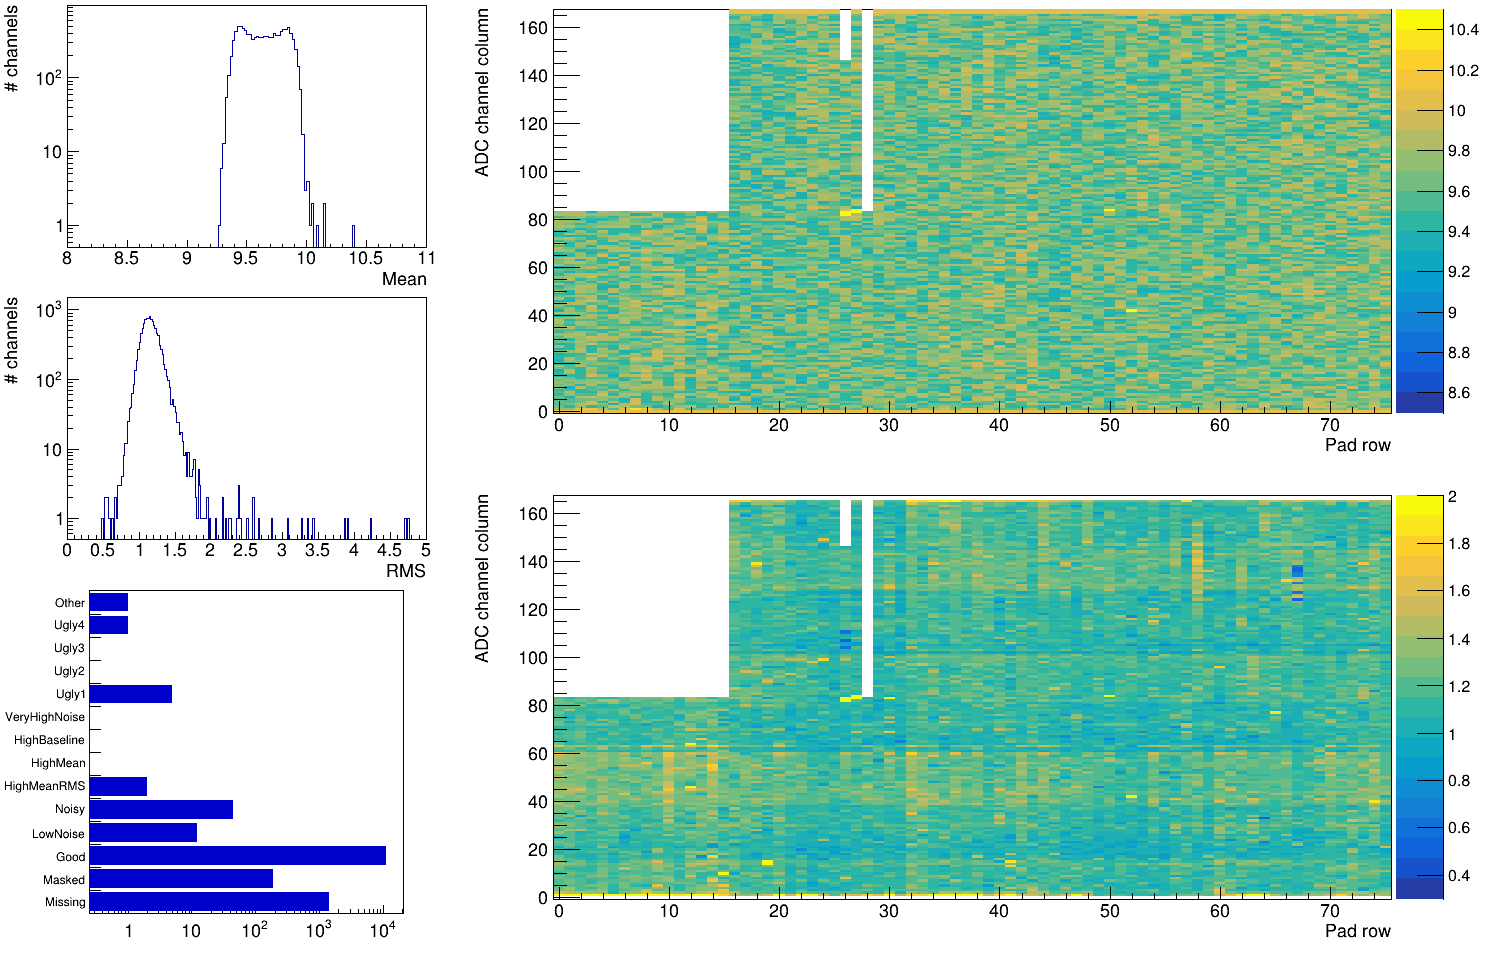

In [11]:
ROOT.MakeLayerPlots(run534640.df, sector=8, layer=3, classifier=ROOT.classifier).Draw()

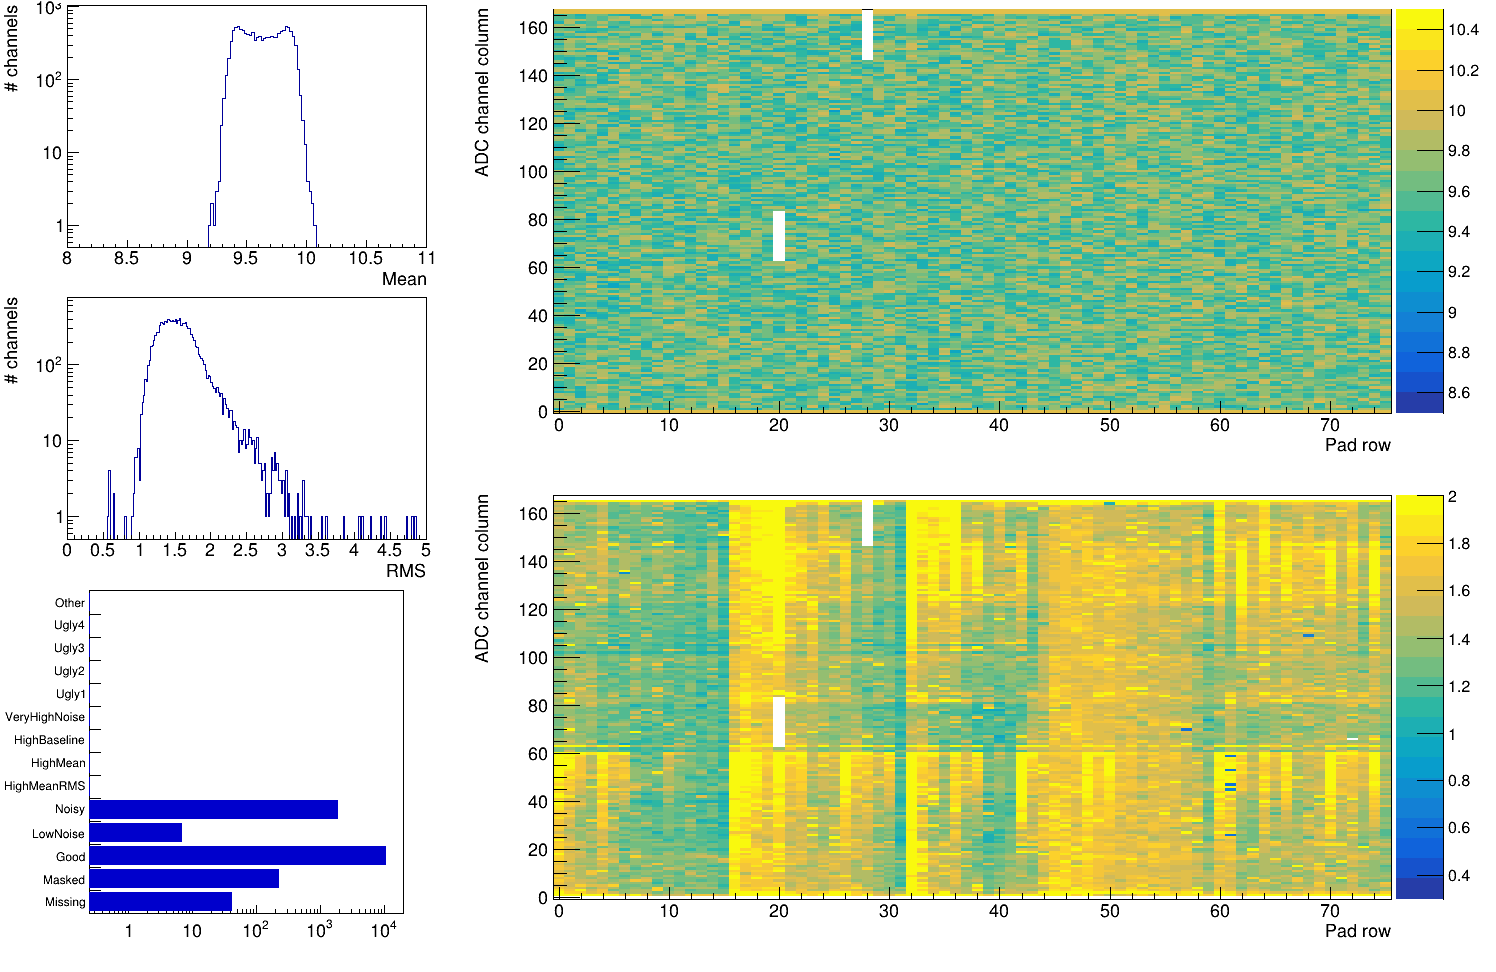

In [12]:
ROOT.MakeLayerPlots(run534640.df, sector=4, layer=4, classifier=ROOT.classifier).Draw()

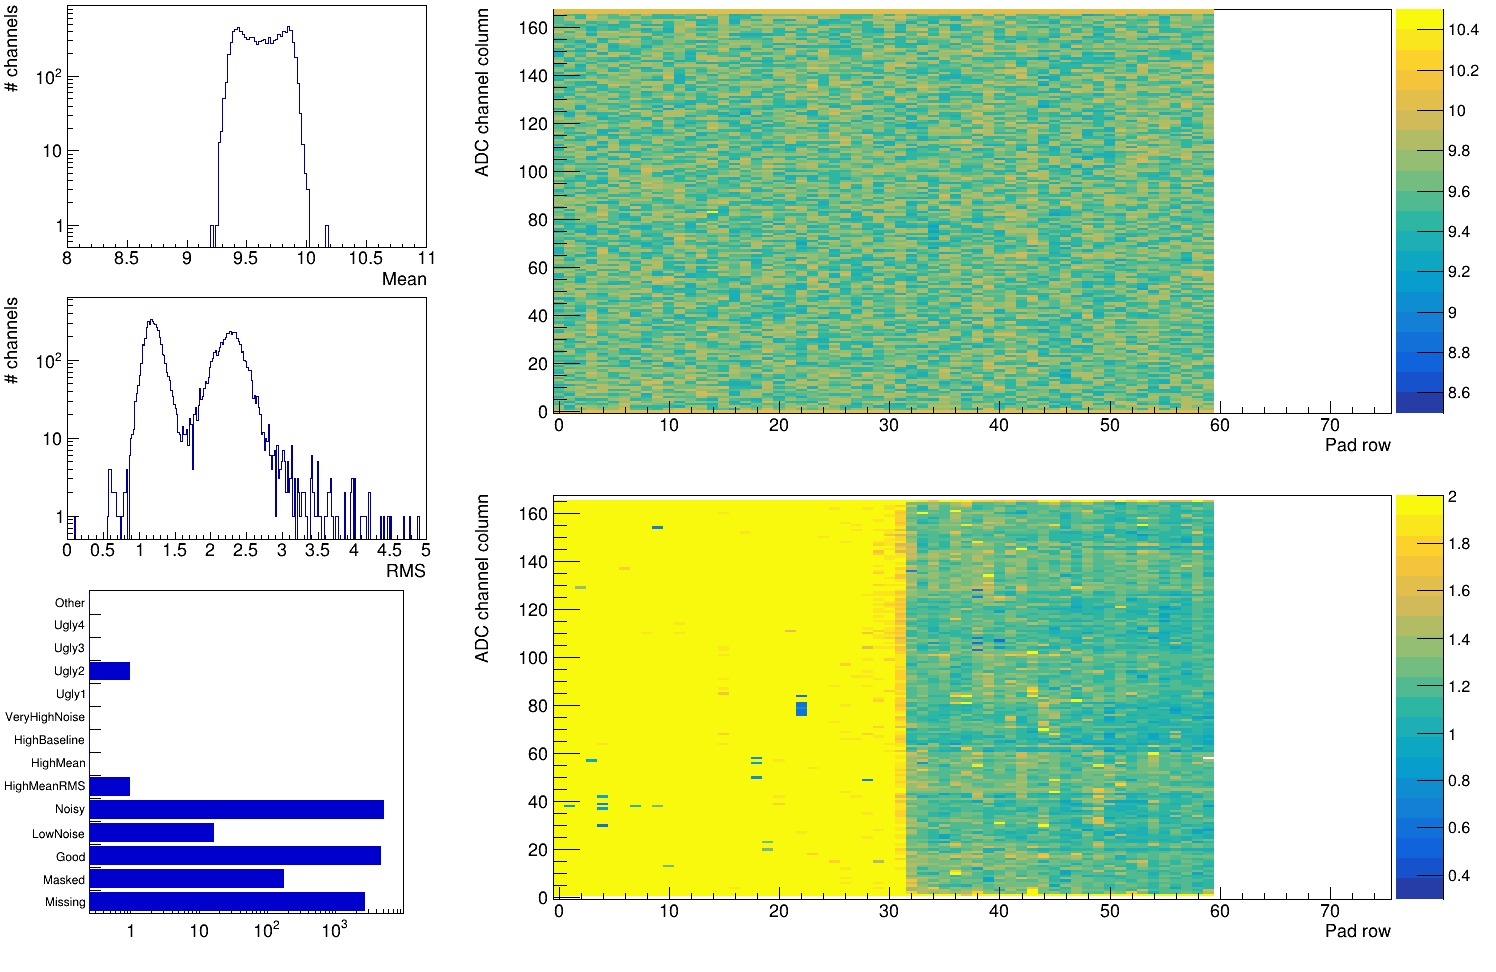

In [13]:
ROOT.MakeLayerPlots(run534640.df, sector=12, layer=5, classifier=ROOT.classifier).Draw()